<a href="https://colab.research.google.com/github/ovieimara/ITNPAI1/blob/master/AI1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Word distributions: context

In this first exercise you will display the context of occurrence of a specific word. You need to upload a .txt file (you can do so in Colab by clicking on the 'folder' icon, then on the file icon with an upward arrow). Once this is done you will see the file name. You can obtain its path by clicking on the three dots, then 'copy path'. You will paste it in the file_path variable below.
You need to assemble your own text file (from previous documents, or pasting text from web sites into a documents) of at least a few thousand words.
Then you can select specific words, one at a time, that you will enter as 'target_word' below and you will see in which context they occur (this requires that the word has multiple occurrences, which is more likely with larger text documents).

In [3]:
def get_word_contexts_aligned(file_path, target_word, context_size=5):
    """
    Extracts occurrences of a target word with n words of context before and after,
    aligning them for better visualization.

    Args:
        file_path (str): Path to the text file.
        target_word (str): Word to find in the text.
        context_size (int): Number of words before and after the target word to include as context.

    Returns:
        List[Tuple[str, str, str]]: A list of tuples (before, target, after) for each occurrence.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize the text into words
    words = text.split()

    # Find occurrences of the target word and extract contexts
    contexts = []
    for i, word in enumerate(words):
        if word.lower() == target_word.lower():  # Case-insensitive matching
            before = " ".join(words[max(0, i - context_size):i])
            after = " ".join(words[i + 1:i + 1 + context_size])
            contexts.append((before, word, after))

    return contexts


def display_aligned_contexts(contexts, context_size=5):
    """
    Displays contexts in a neatly aligned format.

    Args:
        contexts (List[Tuple[str, str, str]]): List of (before, target, after) tuples.
        context_size (int): Number of words in the context (used for formatting).
    """
    # Find the maximum length of "before" and "after" parts for alignment
    before_width = max(len(c[0]) for c in contexts) if contexts else 0
    after_width = max(len(c[2]) for c in contexts) if contexts else 0

    print(f"{'Before'.ljust(before_width)} | {'Target'} | {'After'.ljust(after_width)}")
    print("-" * (before_width + after_width + len(" | Target | ")))

    for before, target, after in contexts:
        print(f"{before.ljust(before_width)} | {target} | {after.ljust(after_width)}")


# Example usage
file_path = '/content/cancer.txt'  # Replace with the path to your text file
target_word = 'cancer'  # Replace with your target word
context_size = 5  # Adjust context size as needed

contexts = get_word_contexts_aligned(file_path, target_word, context_size)

if contexts:
    display_aligned_contexts(contexts, context_size)
else:
    print(f"No occurrences of the word '{target_word}' found in the text.")


Before                                                | Target | After                                        
--------------------------------------------------------------------------------------------------------------
﻿Prostate Cancer: An Overview Prostate                | cancer | is a significant health concern              
transports sperm. This type of                        | cancer | is one of the most                           
In its early stages, prostate                         | cancer | often does not cause noticeable              
The exact cause of prostate                           | cancer | is not known, but several                    
A family history of prostate                          | cancer | or certain types of breast                   
or certain types of breast                            | cancer | can increase the risk. *                     
Obese men diagnosed with prostate                     | cancer | may be more likely to                        
a

#Semantic distributions
##One common aspect of modern natural language processing is that word meaning is represented in high-dimensional spaces through 'embeddings'. Before we get into technical details (from embedding models to transformers) the objective of this exercise is to familiarise yourself with semantic spaces. These are high-dimensional which makes them difficult to visualise. Using UMAP as a dimension reduction method we can support 2D or 3D visualisation. Let's start with 2D visualisation: words from the text you have chose will be distributed in the 2D space according to their semantic properties. You can look into several properties:
*   take two words: how far are they from one another? what do they differ about in terms of meaning?
*   take one word and look at its neighbours: is there some form of common meaning or common property?

In [4]:
%%capture
!pip install sentence-transformers umap-learn pandas matplotlib

In [5]:
import warnings
warnings.filterwarnings('ignore')

##First we need to remove 'stopwords' from the text to concentrate on the words that 'carry' meaning. We are using the Python package nltk (not a deep learning package) for the preprocessing.

In [11]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk

# Download NLTK resources if not already present
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

def load_unique_words(file_path):
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

    # Return the unique words
    unique_words = list(set(filtered_words))
    return unique_words


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


#the output is a list of unique words from your text, unique_words
#Now, load the text file by entering the path below and activate the cell to calculate the set of unique words

In [12]:
# Example file path
text_file_path = '/content/cancer.txt'  # Replace with the path to your text file

# Get the unique words
unique_words = load_unique_words(text_file_path)

# Display a subset of unique words (or the full list as needed)
print(f"Found {len(unique_words)} unique words (excluding stopwords):")
print(unique_words[:50])  # Display up to 50 words


Found 251 unique words (excluding stopwords):
['effective', 'prostate', 'diagnosing', 'causes', 'sure', 'concern', 'care', 'immediate', 'dre', 'level', 'proactive', 'stages', 'blood', 'increases', 'conclusion', 'worldwide', 'specific', 'american', 'diagnosed', 'advanced', 'prevent', 'dairy', 'sample', 'depends', '1', 'however', 'monitoring', 'stream', 'microscope', 'family', 'performed', 'hormones', 'maintain', 'become', 'obesity', 'healthcare', 'pelvic', 'clinic', 'steps', 'progresses', 'especially', 'challenging', 'questions', 'internal', 'exam', 'produces', 'semen', 'without', 'overview', 'fluid']


##For embeddings we are going to use a small version of BERT (which is one of the first LLM) from which we only use the embedding part. It's use is free, no need for 'API keys'. Later we will see plenty of other embedding models. For the full set of words from your document we are going to generate embeddings.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
import torch
from transformers import AutoTokenizer, AutoModel
from scipy.spatial.distance import pdist, squareform
from scipy.stats import entropy


#Initialize the pre-trained embedding model
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def get_embeddings(text_list):
    embeddings = []
    for text in text_list:
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=50)
        with torch.no_grad():
            outputs = model(**inputs)
            embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())
    embeddings = np.array(embeddings)
    print(embeddings.shape)
    return embeddings


# Main function to orchestrate the process
embeddings = get_embeddings(unique_words)


(251, 384)


##Now these embeddings are 'small' but that is still ... 384 dimensions! So we'll be using UMAP to reduce dimensionality to 2 which will make it possible togenerate 2D plots of word distributions and inspect them.

In [18]:
# Reduce dimensionality with UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_embeddings = umap_reducer.fit_transform(embeddings)

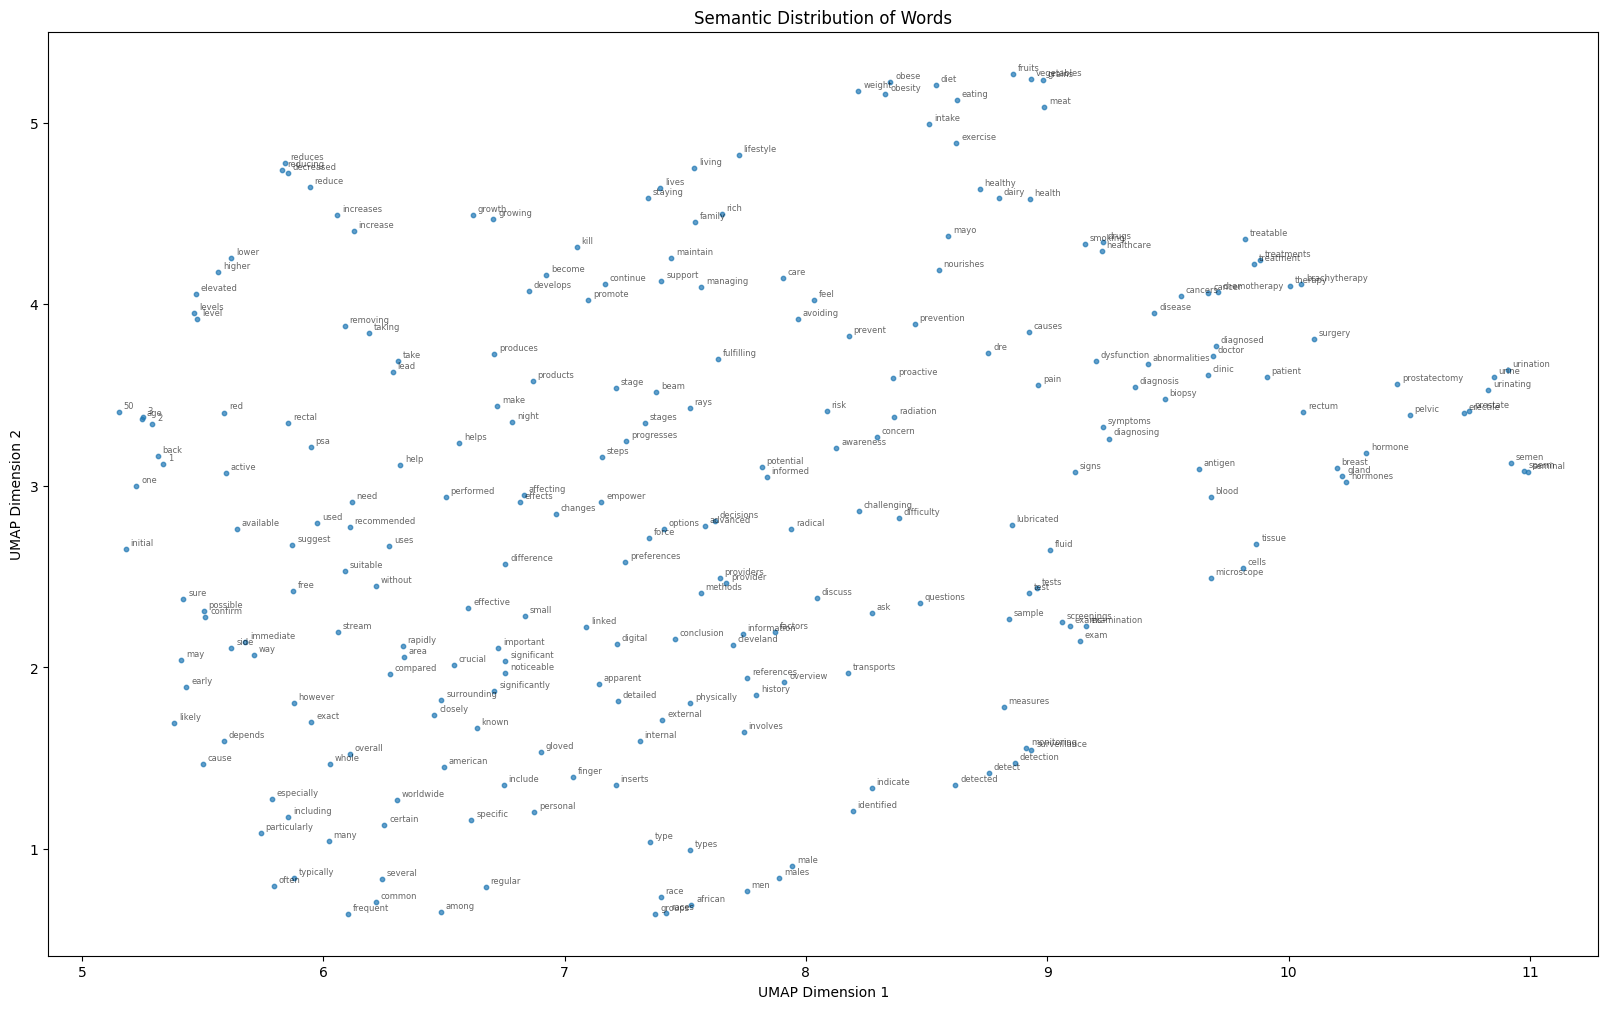

In [19]:
# Plot the embeddings
plt.figure(figsize=(20, 12))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], s=10, alpha=0.7)
for i, name in enumerate(unique_words):
    plt.text(umap_embeddings[i, 0] + 0.02, umap_embeddings[i, 1] + 0.02, name, fontsize=6, alpha=0.6)
plt.title("Semantic Distribution of Words")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

##now let's reduce to 5 dimensions: we will be able to plot different pairs of dimensions as a different way to inspect the semantic distributions.

In [20]:
# Reduce dimensionality with UMAP to 5 components, so we have options for different 2D projections
umap_reducer = umap.UMAP(n_components=5, random_state=42)
umap_embeddings = umap_reducer.fit_transform(embeddings)


##you can modify the dimension pairs below

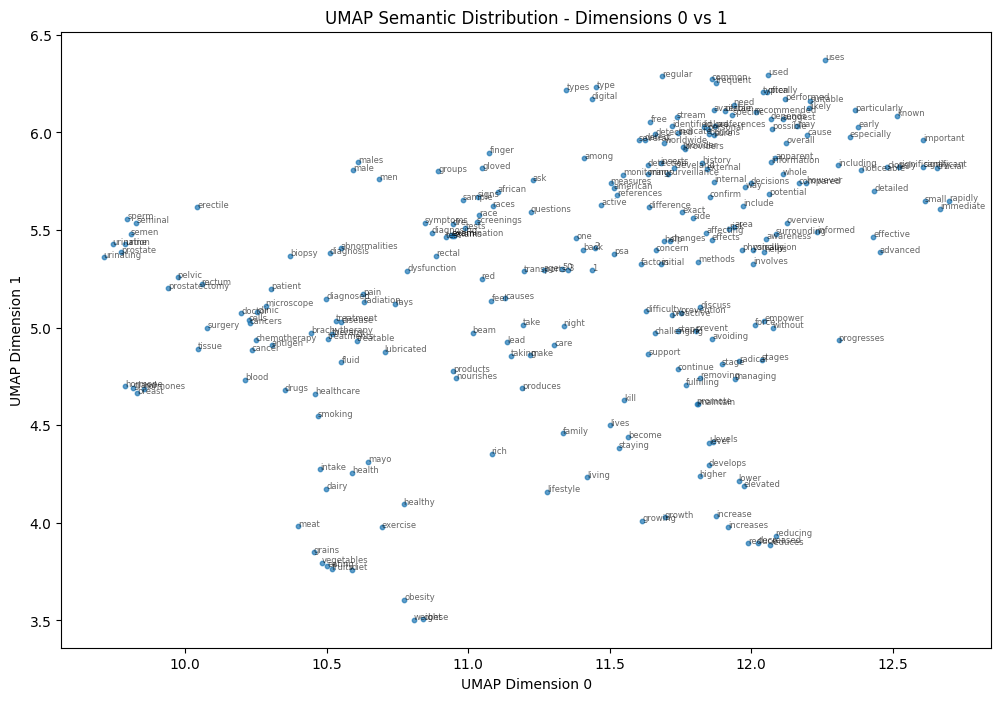

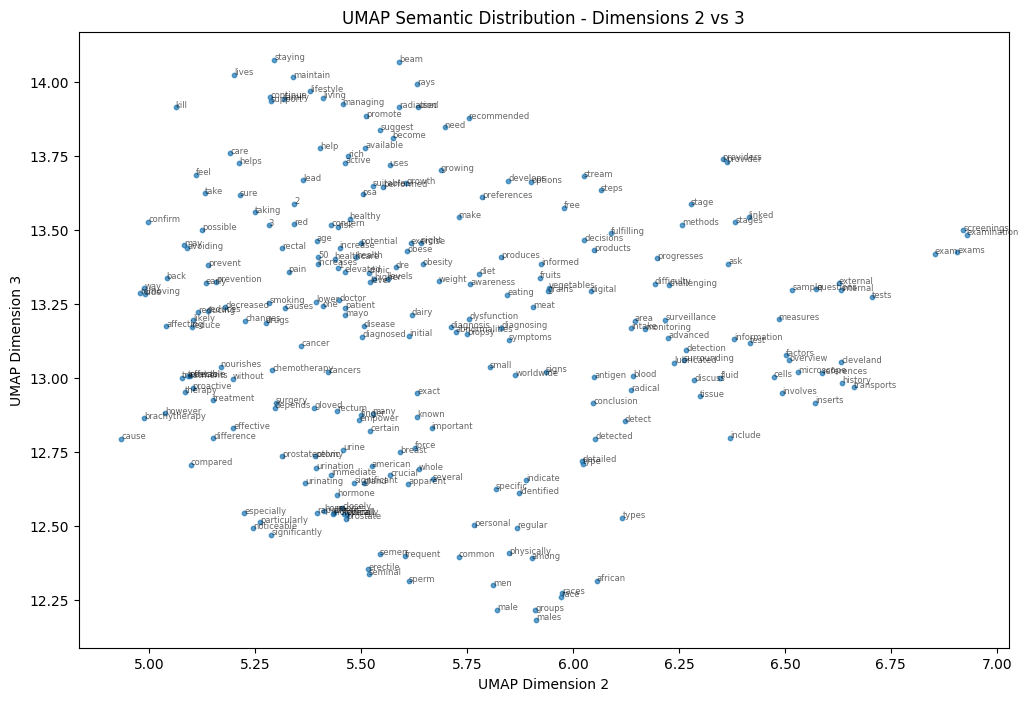

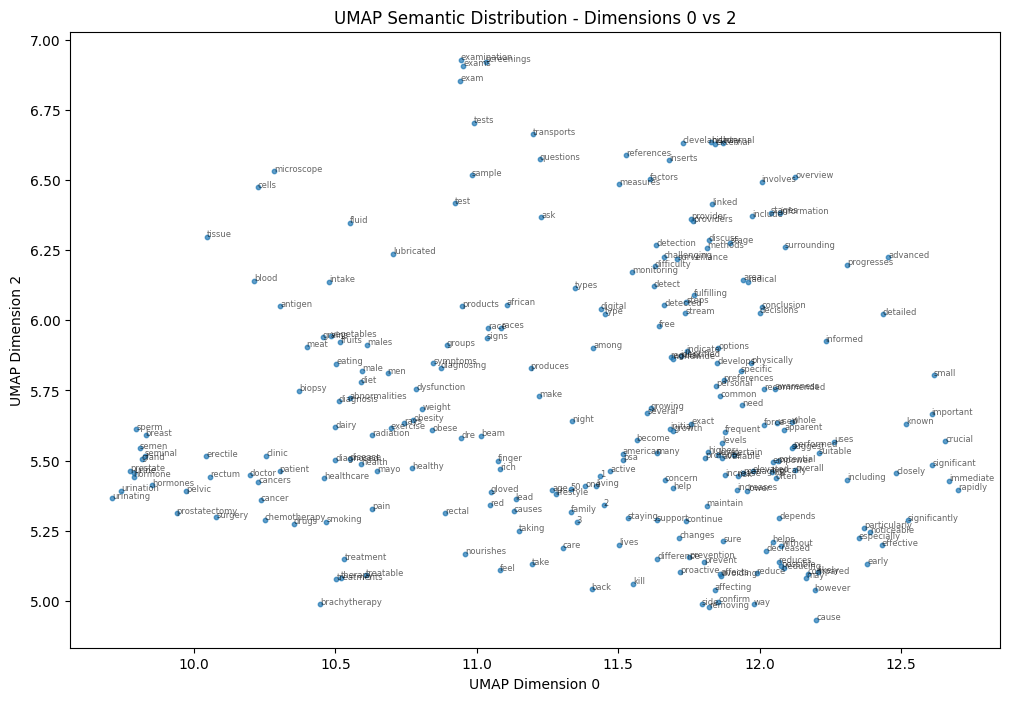

In [21]:
import matplotlib.pyplot as plt

# Define pairs of dimensions for each 2D plot
dimension_pairs = [(0, 1), (2, 3), (0, 2)]

for i, (dim_x, dim_y) in enumerate(dimension_pairs):
    plt.figure(figsize=(12, 8))
    plt.scatter(umap_embeddings[:, dim_x], umap_embeddings[:, dim_y], s=10, alpha=0.7)
    for j, name in enumerate(unique_words):
        plt.text(umap_embeddings[j, dim_x], umap_embeddings[j, dim_y], name, fontsize=6, alpha=0.6)
    plt.title(f"UMAP Semantic Distribution - Dimensions {dim_x} vs {dim_y}")
    plt.xlabel(f"UMAP Dimension {dim_x}")
    plt.ylabel(f"UMAP Dimension {dim_y}")
    plt.show()

#3D Visualisation
##Now you have reduced to 3 dimensions and will be displaying words in this reduced semantic space. It's an interactive visualisation: using the menu that appears at the top-right corner of the cell you can rotate or zoom. That means you can navigate into this 3D space. Try to look for some words you know: what relation do you think they have with neighbourig words? If you consider the words distributed across any of the three UMAP-reduced dimensions, can you try to guess what kind of semantics is captured by each dimension?

In [22]:
import plotly.express as px
import pandas as pd

# Convert UMAP data and labels to a DataFrame
umap_df = pd.DataFrame(umap_embeddings, columns=[f'UMAP Dimension {i}' for i in range(5)])
umap_df['UniqueWords'] = unique_words

# 3D plot using the first three UMAP dimensions
fig = px.scatter_3d(umap_df, x='UMAP Dimension 0', y='UMAP Dimension 1', z='UMAP Dimension 2',
                    text='UniqueWords', title="3D Semantic Distribution of Words")
fig.update_traces(marker=dict(size=4), textfont_size=6)
fig.show()
